MNIST dataset which is  handwritten  numeric digit between 0 to 9
Purpose of building Artificial Neural Network(ANN) model is to predict next digit from the user defined dataset

In [21]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import tensorflow as tf
import seaborn as sns

In [22]:
# creating a blank mnist dataset
mnist_dataset = tf.keras.datasets.mnist

In [23]:
mnist_dataset

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.8/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [24]:
# loading mnist dataset and seggreating into X_train, X_test and y_train and y_test
(X_train_full,y_train_full),(X_test,y_test)= mnist_dataset.load_data()

In [25]:
# printing shape of X_train_full
X_train_full.shape

(60000, 28, 28)

In [26]:
# printing shape of y_train_full

y_train_full.shape

(60000,)

In [27]:
X_test.shape

(10000, 28, 28)

In [28]:
y_test.shape

(10000,)

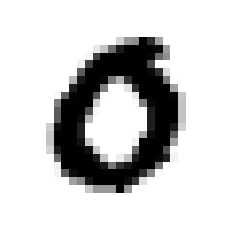

In [29]:
# printing one particular handwritten image at index 8000

plt.imshow(X_train_full[8000],cmap='binary')
plt.axis("off")
plt.show()

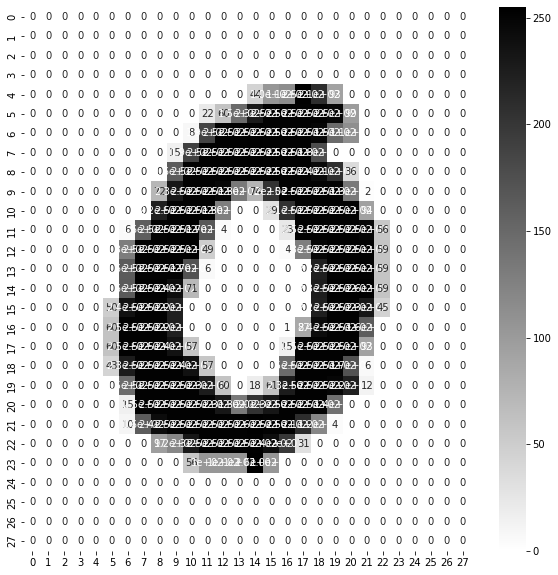

In [30]:
# printing heatmap of the handwritten image at index 8000

plt.figure(figsize=(10,10))
sns.heatmap(X_train_full[8000],annot=True,cmap="binary")

In [31]:
# Unit Scaling which will help in fast convergence while performing Gradient Descent doing backward propagation.

# Scale the data between 0 to 1 by dividing it by 255, as Pixel size is between 0 to 255 and dividing it by 255 will give values between 0 to 1.
# First 5000 records will be part of validation data and remaining are put under Training data

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [32]:
# scale the test data too
X_test = X_test/255

In [34]:
print(f"X_train_full.shape :{X_train_full.shape}")
print(f"X_train.shape :{X_train.shape}")
print(f"X_valid.shape : {X_valid.shape}")
print(f"X_test.shape : {X_test.shape}")
print(f"y_train_full.shape : {y_train_full.shape}")
print(f"y_train.shape : {y_train.shape}")
print(f"y_valid.shape : {y_valid.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train_full.shape :(60000, 28, 28)
X_train.shape :(55000, 28, 28)
X_valid.shape : (5000, 28, 28)
X_test.shape : (10000, 28, 28)
y_train_full.shape : (60000,)
y_train.shape : (55000,)
y_valid.shape : (5000,)
y_test.shape: (10000,)


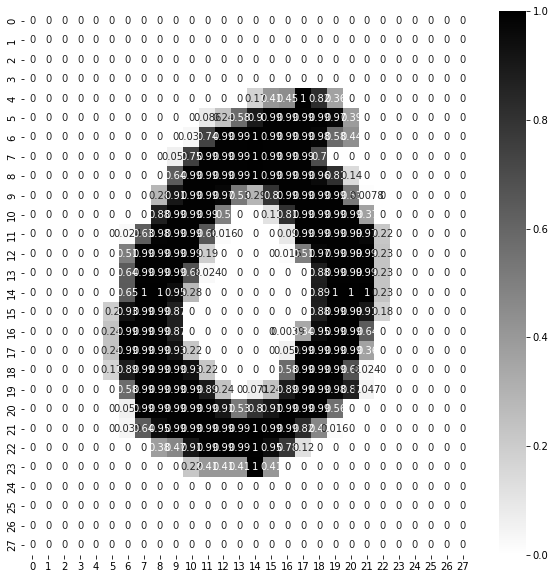

In [37]:
# Printing heatmap of the handwritten image at index 3000 after doing scaling

plt.figure(figsize=(10,10))
sns.heatmap(X_train[3000],annot=True,cmap="binary")

In [41]:
# Building Neural Network 

# We need to flatten the image which is currently in 2 D matrix of size 28 * 28  into 1 D matrix, which eventually will become input layer
# Hidden Layer 1 will have 300 neurons, we will use "relu" activation
# Hidden Layer 2 will have 100 neurons, we will use "relu" activation
# Output Layer 1 will have 10 neurons as it is multiclass classification with 10 images from 0-9. We will use softmax activation


LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name= "inputlayer"),
        tf.keras.layers.Dense(300,activation='relu',name= "hiddenlayer1"),
        tf.keras.layers.Dense(100,activation='relu',name= "hiddenlayer2"),
        tf.keras.layers.Dense(10,activation='softmax',name= "outputlayer")]

In [43]:
# Building sequential classifier model by passing Neural layers as parameter

model_clf=tf.keras.models.Sequential(LAYERS)

In [44]:
# Checking summary of the model
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
